In [13]:
import numpy as np
from PIL import Image
import colorsys

### Create PIL Image and return np array

In [14]:
def get_image_pixel(imagePIL, resize="None"):
    if resize == "None":   
        return imagePIL, np.array((imagePIL.getdata())# np.array(imagePIL.getdata()) #list(imagePIL.getdata())
    else:
        org_size = imagePIL.size
        pixelate_lvl = resize
        imagePIL = imagePIL.resize(size=(org_size[0] // pixelate_lvl, org_size[1] // pixelate_lvl), resample=0)# imagePIL.resize((resize,resize), resample=Image.BILINEAR)
        return imagePIL, np.array(imagePIL.getdata())

### Sort Array of Colors

In [15]:
def sortColors(colors, method):
    colors = (colors / 255) # colorsys uses 0 - 1 range 
    hsv_values = np.apply_along_axis(RGBToHSV, axis=1, arr=colors)

    if method == "HUE":
        hsv_values = hsv_values[hsv_values[:, 0].argsort()]
    elif method == "SATURATION":
        hsv_values = hsv_values[hsv_values[:, 1].argsort()]
    elif method == "BRIGHTNESS":
        hsv_values = hsv_values[hsv_values[:, 2].argsort()]
        
    rgb_values = np.apply_along_axis(HSVToRGB, axis=1, arr=hsv_values)
    rgb_values = (rgb_values * 255).astype(int) # convert color range back to 0 - 255
    return rgb_values
    
def RGBToHSV(color):
    return colorsys.rgb_to_hsv(color[0], color[1], color[2])
   
def HSVToRGB(color):
    return colorsys.hsv_to_rgb(color[0], color[1], color[2])

### Main

In [19]:
image_path = "test_images/m_83142.jpg"
imagePIL = Image.open(image_path, "r")

im, pixel_values = get_image_pixel(imagePIL, 1)

In [20]:
sortedImage = sortColors(pixel_values, "HUE") # "HUE, "SATURATION", "BRIGHTNESS"

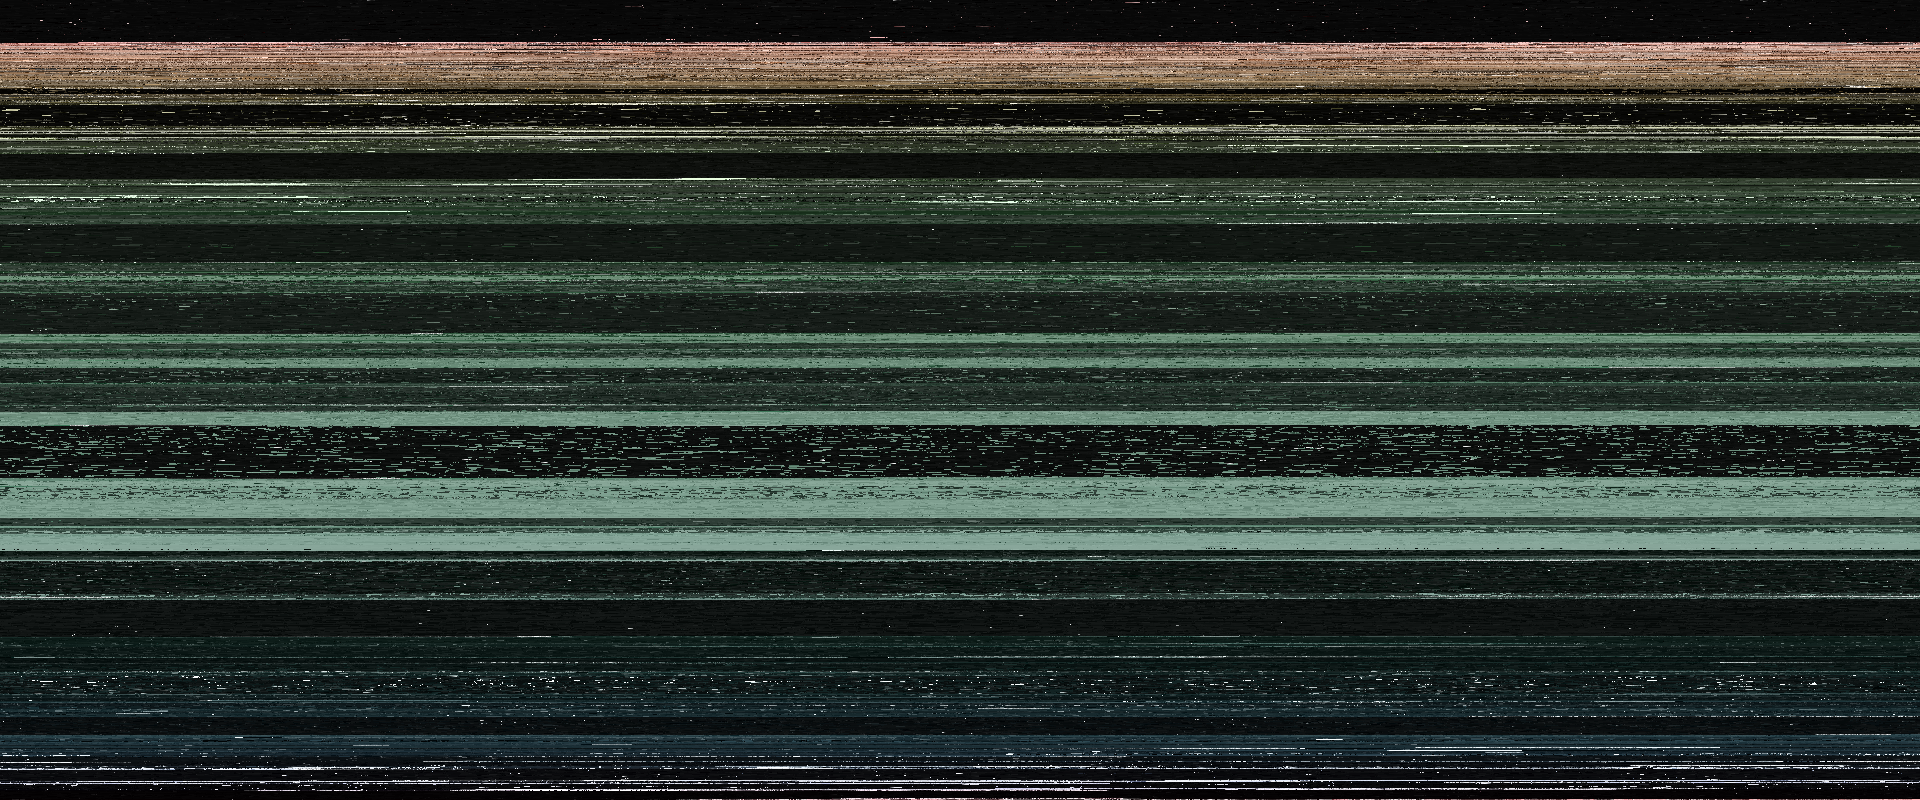

In [21]:
im.putdata(list(map(tuple, sortedImage)))
im.resize(imagePIL.size, resample=0)